In [87]:
import numpy as np
import math

points = np.random.uniform(low=-10, high=10, size=(100, 2))
points = np.asarray(points)

In [88]:
# x = np.random.uniform(-10, 10, 100)
# 
# points = []
# 
# for i in x:
#     points.append((i,i**2))
# points = np.asarray(points)

In [89]:
points

array([[-6.04227885, -5.84012347],
       [ 2.62135168,  7.23934393],
       [ 0.24965227,  9.84412629],
       [ 5.35089176,  2.24845615],
       [ 9.48900514,  6.31048338],
       [ 0.98126982,  5.79272842],
       [ 9.0115688 , -0.39347096],
       [ 9.72796719,  2.6382637 ],
       [ 9.05386658,  2.68870747],
       [ 1.67483526,  3.57323733],
       [-4.38971721, -0.53208132],
       [ 5.82209   ,  7.86547408],
       [-5.36944639,  0.6373031 ],
       [-6.00084859,  7.78902886],
       [ 0.59194204, -6.22141445],
       [ 5.51238377,  2.06320503],
       [ 5.51303831,  7.78766879],
       [ 2.98612439,  0.57112021],
       [-4.1702599 , -7.69039386],
       [ 4.80507916,  4.60742698],
       [ 3.3301961 , -0.52336628],
       [-7.45863071,  9.22862045],
       [ 9.47902607,  6.89571458],
       [ 1.06245298, -7.94553823],
       [-9.08447595, -4.84736236],
       [ 0.30445408, -7.64370682],
       [ 6.51264895, -0.61966009],
       [-9.88581066,  3.16490247],
       [ 1.01698903,

In [90]:
np.linalg.norm(points[0,:])

8.40334313897432

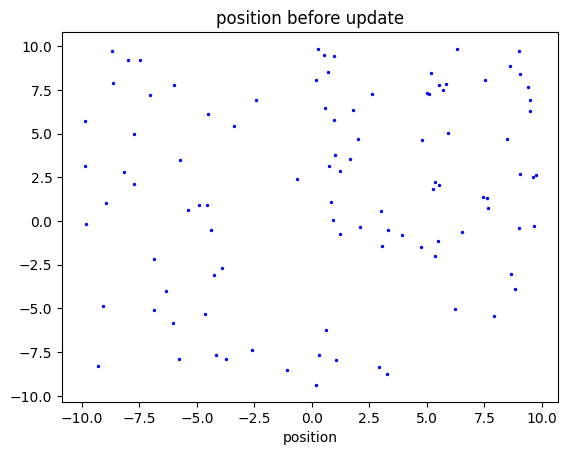

In [91]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(points)
max_num = np.max(points)

# 1차원 선 그리기
# plt.figure(figsize=(10, 2))

# nums 값들을 선 위에 점으로 시각화
for point in points:
    plt.scatter(point[0], point[1], color='b', s=2)

plt.title('position before update')
plt.xlabel('position')
plt.show()

In [92]:
# from scipy.stats import norm
# from scipy.spatial.distance import cdist
# 
# count = 0
# 
# while count < 100:
# 
#     # dens = np.zeros(len(points))
#     dens = []
#     vec = np.zeros((len(points), 2))
# 
#     for i in range(len(points)):
#         sum_pdf = 0
#         vec_total = 0
# 
#         # 여기에 가우시안 넣어야 될듯
#         for num2 in points:
#             if not np.array_equal(points[i], num2):
#                 # gaussian 커널로 점들간 거리에 따라 확률추정
#                 # 이게 벡터의 크기
#                 distance = np.linalg.norm(points[i] - num2)
#                 p = norm.pdf(distance, 0, 1)
#                 # 점 num에서 확률추정
#                 sum_pdf += p
# 
#                 vec_total += p * (points[i] - num2) / distance
# 
#         dens.append(sum_pdf / (len(points)-1))
#         vec[i] = vec_total
# 
#     dens /= np.sum(dens)
#     points += vec
#     count += 1

기울기에 따라 이동하는 방법 필요
어디에다 projection 해야됨??????

In [93]:
from scipy.stats import norm
import numpy as np
from scipy.spatial.distance import cdist

# 가우시안 커널 함수
def gaussian_kernel(x, sigma=1):
    return np.exp(-0.5 * (x / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

count = 0
enp = [float('inf')]

while True:
    diff_matrix = cdist(points, points)
    
    np.fill_diagonal(diff_matrix, np.inf)

    # 가우시안 커널 밀도 계산
    pdf_matrix = gaussian_kernel(diff_matrix)

    # 각 점에서의 밀도 및 벡터 업데이트 계산
    dens = np.sum(pdf_matrix, axis=1) / (len(points) * (len(points) - 1))
    vec = np.sum(pdf_matrix[:, :, np.newaxis] * (points[:, np.newaxis, :] - points[np.newaxis, :, :]) / diff_matrix[:, :, np.newaxis], axis=1)

    # points[:, 1] = points[:, 0] ** 2  # y값을 x^2로 고정

    # 엔트로피 계산
    current_entropy = -np.sum(dens * np.log(dens + 1e-10))  # 확률분포로 정규화한 후 로그 엔트로피 계산

    enp.append(current_entropy)

    # 엔트로피 변화가 매우 작을 때 중지
    if abs(enp[-2] - current_entropy) < 1e-8 and current_entropy == min(enp):
        break

    points += 0.9 * vec  # vec의 크기 조절
    count += 1


11874


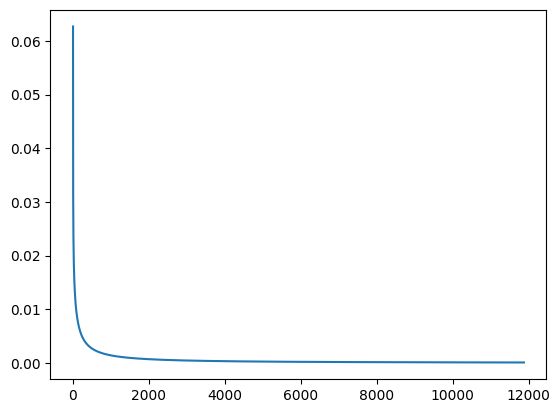

In [94]:
print(len(enp))
plt.plot(enp)

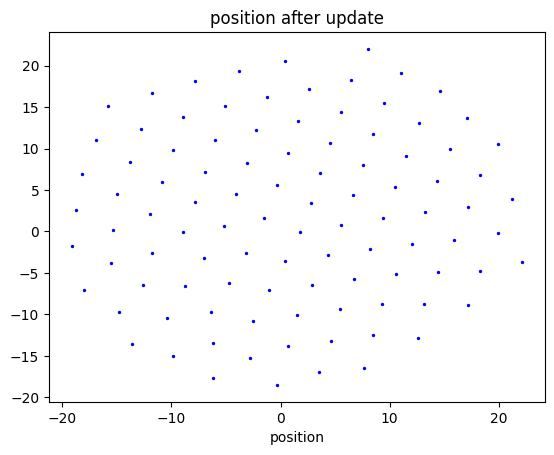

In [95]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(points)
max_num = np.max(points)

# 1차원 선 그리기
# plt.figure(figsize=(10, 2))

# nums 값들을 선 위에 점으로 시각화
for point in points:
    plt.scatter(point[0], point[1], color='b', s=2)

plt.title('position after update')
plt.xlabel('position')
plt.show()